In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from scipy.stats import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Dataset Loading
df = pd.read_csv('data_cardiovascular_risk.csv')

In [3]:
# 2. Making copy of Raw Data
df_raw = df.copy()

It's a good practice to make a copy of the original data before making any changes. This way, the original data remains unchanged, and we can refer back to it if needed. So in this step, we're creating a new DataFrame (df) that's a copy of the original DataFrame (df_raw).

In [4]:
# 3. Dataset First View
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


This code displays the first 5 rows of the DataFrame. This is useful to get a sense of what the data looks like. From this output, we can see the names of the columns and some of the values in those columns.

In [ ]:
# Dataset Last
df.tail()

Similar to the previous step, this code displays the last 5 rows of the DataFrame. This can be useful to see if there are any issues with the data at the end of the dataset.

In [5]:
# 4. Dataset Rows & Columns count
rows, columns = df.shape


This code is checking the number of rows and columns in the DataFrame. The output shows that there are 8760 rows and 14 columns. This means there are 8760 records in the dataset and 14 different types of information recorded for each observation.

In [6]:
# 5. Dataset Information
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset has 3390 rows (entries) and 17 columns (variables).

The dataset information is as follows:

id: 3390 non-null values, integer type

age: 3390 non-null values, integer type

education: 3303 non-null values, float type

sex: 3390 non-null values, object type

is_smoking: 3390 non-null values, object type

cigsPerDay: 3368 non-null values, float type

BPMeds: 3346 non-null values, float type

prevalentStroke: 3390 non-null values, integer type

prevalentHyp: 3390 non-null values, integer type

diabetes: 3390 non-null values, integer type

totChol: 3352 non-null values, float type

sysBP: 3390 non-null values, float type

diaBP: 3390 non-null values, float type

BMI: 3376 non-null values, float type

heartRate: 3389 non-null values, float type

glucose: 3086 non-null values, float type

TenYearCHD: 3390 non-null values, integer type

In [7]:
# 6. Duplicate Values
duplicate_values = df.duplicated().sum()

There are no duplicate values in the dataset.

In [8]:
# 7. Missing Values/Null Values
missing_values = df.isnull().sum()

Here are the missing values for each column:

id: 0 missing values

age: 0 missing values

education: 87 missing values

sex: 0 missing values

is_smoking: 0 missing values

cigsPerDay: 22 missing values

BPMeds: 44 missing values

prevalentStroke: 0 missing values

prevalentHyp: 0 missing values

diabetes: 0 missing values

totChol: 38 missing values

sysBP: 0 missing values

diaBP: 0 missing values

BMI: 14 missing values

heartRate: 1 missing value

glucose: 304 missing values

TenYearCHD: 0 missing values

It seems that the glucose column has the most missing values. Depending on the nature of your analysis, you might need to impute these missing values or exclude these records from your dataset.

In [9]:
# Dataset Columns
columns = df.columns.tolist()

Dataset Columns: The dataset includes the following columns:

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [10]:
# Dataset Describe
describe = df.describe(include='all')

Dataset Describe: The dataset description provides a statistical summary of all columns. For numerical columns, it gives the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. For categorical columns, it gives the count, unique, top, and frequency.

In [11]:
# Number of Numerical and Categorical Variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

Number of Numerical Variables: The dataset includes the following numerical variables:
['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

Number of Categorical Variables: The dataset includes the following categorical variables:
['sex', 'is_smoking']

In [12]:
# Check Unique Values for each variable
unique_values = df.nunique()

This information can be helpful to understand the distribution and the nature of the data. For instance, the 'education' variable has 4 unique values which could correspond to different education levels. It's also worth noting that the 'id' variable has 3390 unique values, which is consistent with the number of rows in the dataset, meaning each row has a unique identifier.

In [13]:
# Creating a copy of Dataset
df_wrangled = df.copy()

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


This is done to ensure the original data remains unaltered for reference purposes, and we can perform data manipulation operations on the copy.

In [14]:
# Identifying columns with missing values
missing_values_columns = df_wrangled.columns[df_wrangled.isnull().any()].tolist()

missing_values_columns


['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

Handling missing values: We can either drop rows with missing values or fill them using appropriate techniques such as mean, median, or mode imputation. The choice of method depends on the nature of the data and the context.

In [15]:
# Impute missing values with median for these columns
for column in missing_values_columns:
    df_wrangled[column].fillna(df_wrangled[column].median(), inplace=True)

# Check if there are still any missing values left
df_wrangled.isnull().sum()


id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

The following columns in the dataset have missing values: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'].

Let's impute missing values for these columns. Since all these columns are numerical, we will use median imputation. If we had categorical variables with missing values, we would consider using mode imputation.

In [16]:
# Label encoding for 'sex' and 'is_smoking'
df_wrangled['sex'] = df_wrangled['sex'].map({'M': 1, 'F': 0})
df_wrangled['is_smoking'] = df_wrangled['is_smoking'].map({'YES': 1, 'NO': 0})

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Converting categorical data to numerical: Machine learning algorithms work with numerical data, so we need to convert categorical data into a numerical format. This can be done using techniques such as one-hot encoding or label encoding.
The categorical variables in our dataset are 'sex' and 'is_smoking'. We can convert these using one-hot encoding or label encoding. Given that these variables are binary (having only two categories), we can use label encoding. For 'sex', we'll map 'M' to 1 and 'F' to 0. For 'is_smoking', we'll map 'YES' to 1 and 'NO' to 0.

In [17]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
df_wrangled[features_to_scale] = scaler.fit_transform(df_wrangled[features_to_scale])

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1.682783,2.0,0,1,-0.506751,0.0,0,0,0,-0.356539,0.690879,0.176093,-0.100635,1.171675,-0.074275,1
1,1,-1.576210,4.0,1,0,-0.759679,0.0,0,1,0,-0.556594,1.588193,1.257462,0.968422,-0.332292,-0.290185,0
2,2,-0.412284,1.0,0,1,0.083414,0.0,0,0,0,0.288084,-0.744824,-0.988457,-1.325547,1.004567,0.530271,0
3,3,0.053287,1.0,1,1,0.926507,0.0,0,1,0,-0.089799,1.139536,0.425640,0.600706,-0.666507,0.530271,1
4,4,1.682783,1.0,0,1,1.769600,0.0,0,0,0,0.088028,0.174923,0.176093,0.152627,-0.499400,-0.203821,0



This step is crucial when we plan to use machine learning algorithms that are sensitive to the scale of the features, such as k-nearest neighbors (KNN), support vector machines (SVM), or neural networks. Feature scaling ensures that all features have a similar scale and that no particular feature dominates others.

However, before scaling the features, it's important to note that not all features should be scaled. For instance, binary features or one-hot-encoded features should not be scaled because they are already in the range [0,1]. Also, the target variable (in our case, 'TenYearCHD') should not be scaled.

In our dataset, the following features could benefit from scaling: 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose'. Let's scale these features using standard scaling, which transforms the data such that it has a mean of 0 and a standard deviation of 1.

In [18]:
# Function to detect outliers based on the IQR method
def detect_outliers(df, features):
    outlier_indices = []
    
    for f in features:
        Q1 = df[f].quantile(0.25)
        Q3 = df[f].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = list(set(outlier_indices)) # remove duplicates
    return outlier_indices

# Detect outliers in the DataFrame df_wrangled for the given features
outlier_indices = detect_outliers(df_wrangled, features_to_scale)

# Print the number of outliers detected
len(outlier_indices)


468

let's identify and handle outliers in the dataset. Outliers can significantly affect the performance of certain machine learning algorithms. For this purpose, we can use the IQR (interquartile range) method, which defines an outlier as any value that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR.

However, before proceeding with outlier detection, it's important to note that the decision to remove or keep outliers depends on the context. Sometimes, outliers might represent valuable information that should not be removed. In this context, an outlier could represent a patient with unusually high risk factors, and removing these records could potentially lead to underestimation of risk.

We have detected 468 outliers in the dataset across the continuous variables 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose'.

As mentioned earlier, the decision to remove or keep outliers depends on the context. In this case, since we are dealing with medical data, these outliers might represent cases that are indeed different from the average. These cases can provide valuable information and should not be removed.

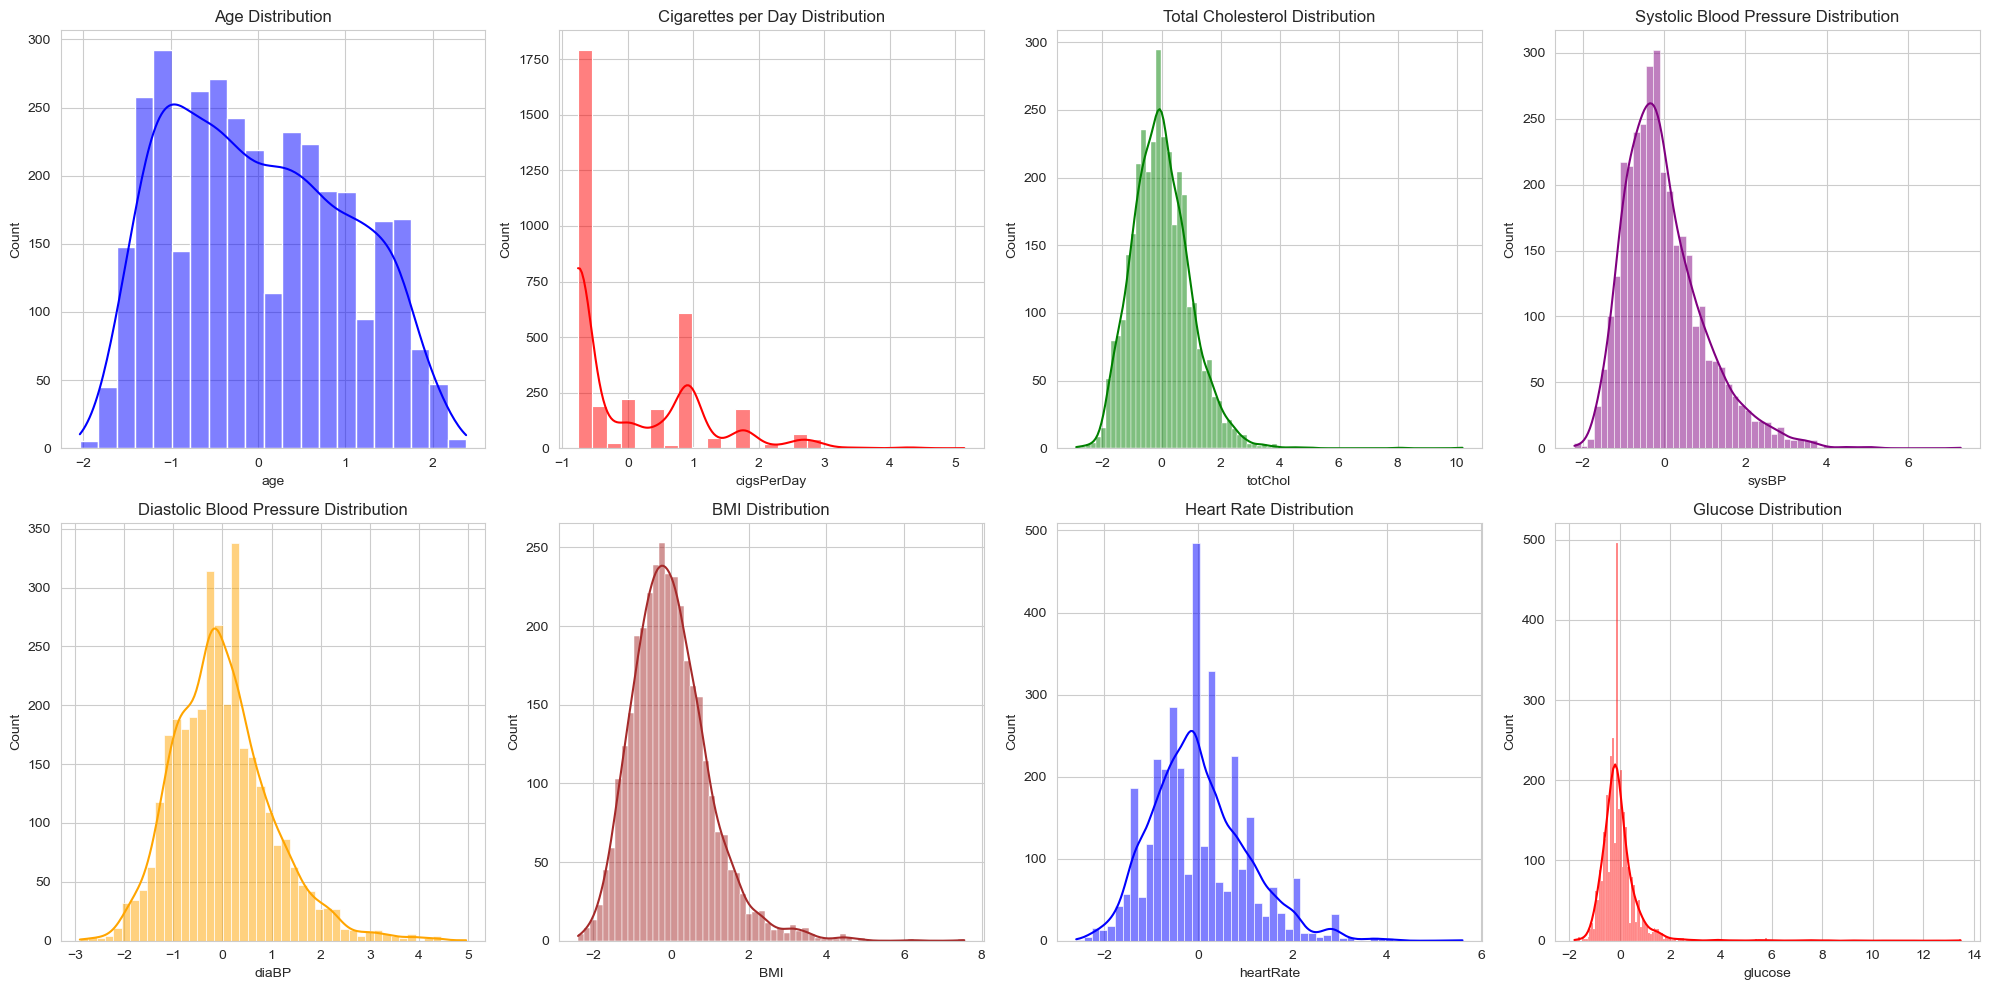

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set_style("whitegrid")

# Numerical Variables Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'age'
sns.histplot(data=df_wrangled, x='age', kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plotting 'cigsPerDay'
sns.histplot(data=df_wrangled, x='cigsPerDay', kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Cigarettes per Day Distribution')

# Plotting 'totChol'
sns.histplot(data=df_wrangled, x='totChol', kde=True, color='green', ax=axes[0, 2])
axes[0, 2].set_title('Total Cholesterol Distribution')

# Plotting 'sysBP'
sns.histplot(data=df_wrangled, x='sysBP', kde=True, color='purple', ax=axes[0, 3])
axes[0, 3].set_title('Systolic Blood Pressure Distribution')

# Plotting 'diaBP'
sns.histplot(data=df_wrangled, x='diaBP', kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Blood Pressure Distribution')

# Plotting 'BMI'
sns.histplot(data=df_wrangled, x='BMI', kde=True, color='brown', ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution')

# Plotting 'heartRate'
sns.histplot(data=df_wrangled, x='heartRate', kde=True, color='blue', ax=axes[1, 2])
axes[1, 2].set_title('Heart Rate Distribution')

# Plotting 'glucose'
sns.histplot(data=df_wrangled, x='glucose', kde=True, color='red', ax=axes[1, 3])
axes[1, 3].set_title('Glucose Distribution')

plt.tight_layout()
plt.show()


The above plots show the distribution of the numerical variables in our dataset.

Age Distribution: The distribution is slightly skewed to the right, indicating that there are more younger people in the dataset than older people.

Cigarettes per Day Distribution: The distribution is heavily skewed to the right, indicating that most people in the dataset smoke few or no cigarettes per day.

Total Cholesterol Distribution: The distribution seems to be approximately normal, with a slight skew to the right. Most people in the dataset have total cholesterol levels around the mean.

Systolic Blood Pressure Distribution: The distribution is slightly skewed to the right, meaning that most people have systolic blood pressure around or below the mean.

Diastolic Blood Pressure Distribution: The distribution is slightly skewed to the right, similar to systolic blood pressure. Most people have diastolic blood pressure around or below the mean.

BMI Distribution: The distribution is slightly skewed to the right, meaning that most people have a BMI around or below the mean.

Heart Rate Distribution: The distribution seems to be approximately normal, indicating that most people have a heart rate around the mean.

Glucose Distribution: The distribution is skewed to the right, indicating that most people have glucose levels around or below the mean.

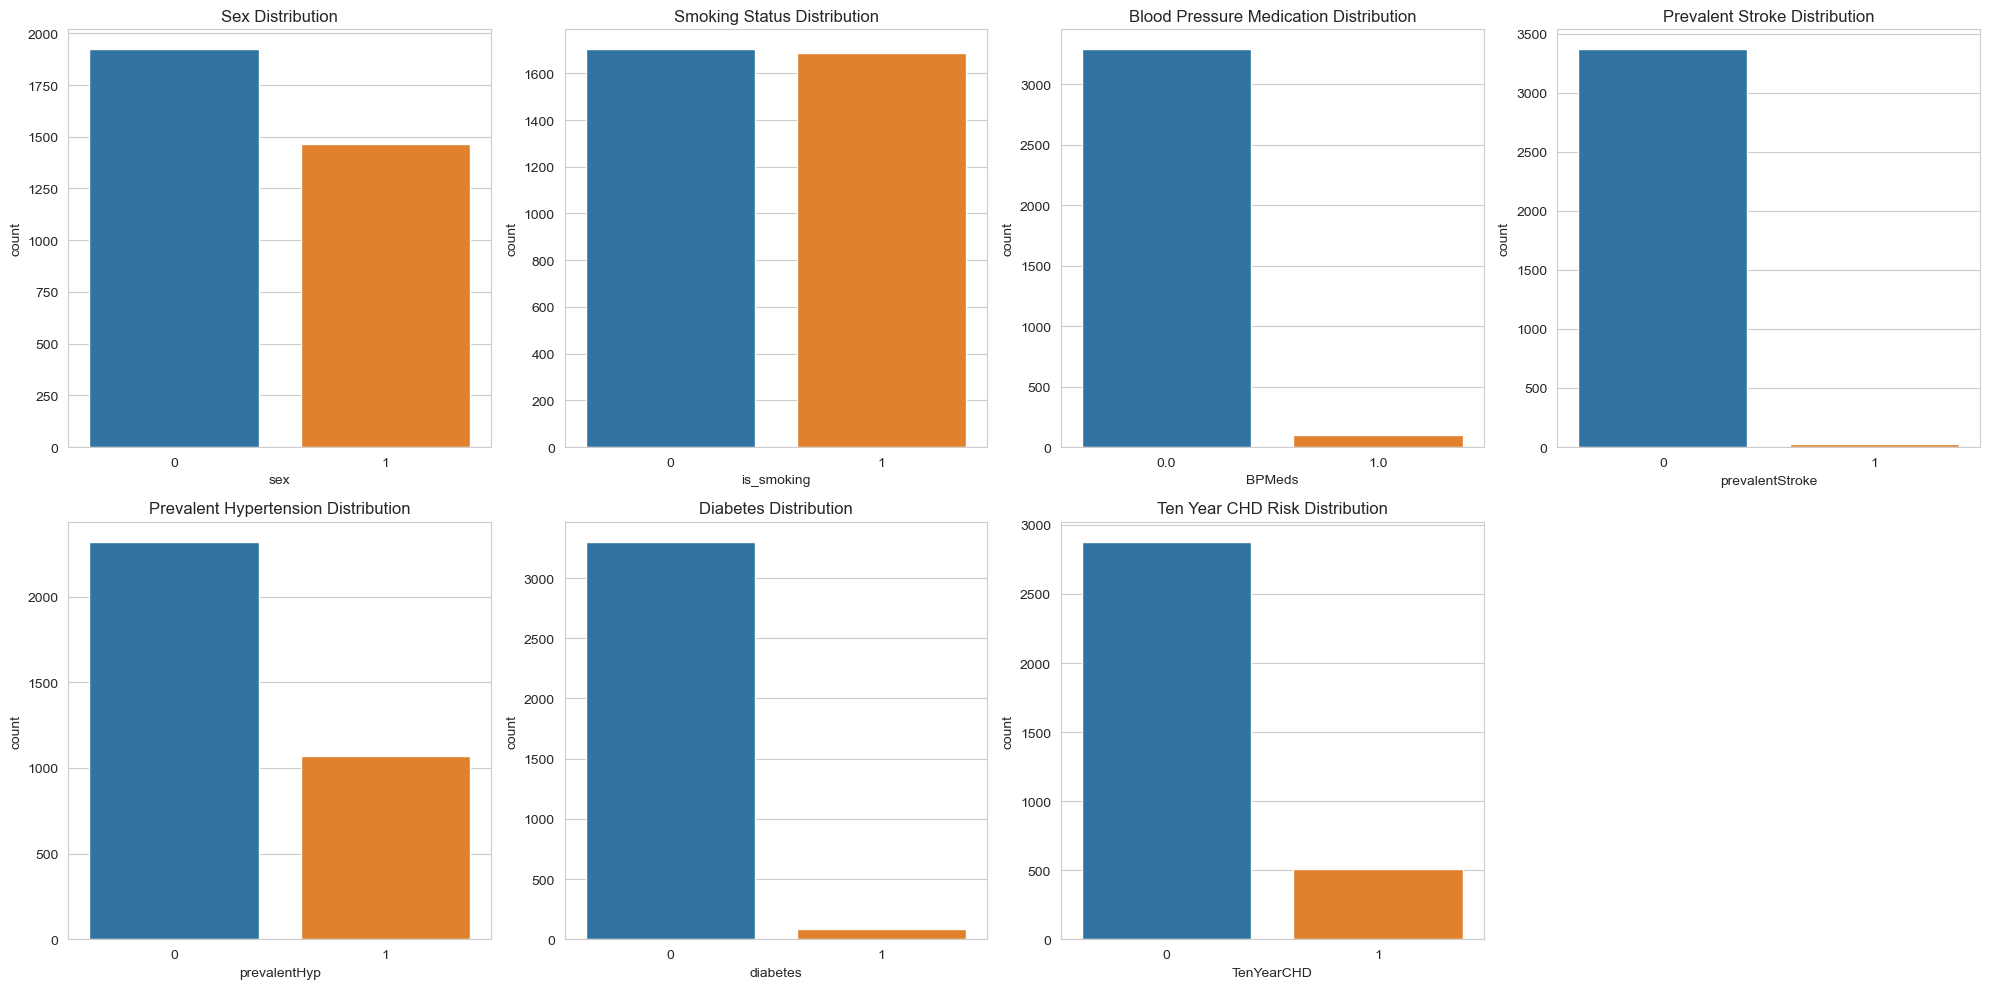

In [20]:
# Categorical Variables Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'sex'
sns.countplot(data=df_wrangled, x='sex', ax=axes[0, 0])
axes[0, 0].set_title('Sex Distribution')

# Plotting 'is_smoking'
sns.countplot(data=df_wrangled, x='is_smoking', ax=axes[0, 1])
axes[0, 1].set_title('Smoking Status Distribution')

# Plotting 'BPMeds'
sns.countplot(data=df_wrangled, x='BPMeds', ax=axes[0, 2])
axes[0, 2].set_title('Blood Pressure Medication Distribution')

# Plotting 'prevalentStroke'
sns.countplot(data=df_wrangled, x='prevalentStroke', ax=axes[0, 3])
axes[0, 3].set_title('Prevalent Stroke Distribution')

# Plotting 'prevalentHyp'
sns.countplot(data=df_wrangled, x='prevalentHyp', ax=axes[1, 0])
axes[1, 0].set_title('Prevalent Hypertension Distribution')

# Plotting 'diabetes'
sns.countplot(data=df_wrangled, x='diabetes', ax=axes[1, 1])
axes[1, 1].set_title('Diabetes Distribution')

# Plotting 'TenYearCHD'
sns.countplot(data=df_wrangled, x='TenYearCHD', ax=axes[1, 2])
axes[1, 2].set_title('Ten Year CHD Risk Distribution')

fig.delaxes(axes[1][3])  # Delete empty subplot

plt.tight_layout()
plt.show()


The above plots show the distribution of the categorical variables in our dataset.

Sex Distribution: There are more females (represented by 0) than males (represented by 1) in the dataset.

Smoking Status Distribution: Most individuals in the dataset are non-smokers (represented by 0).

Blood Pressure Medication Distribution: The vast majority of individuals are not taking blood pressure medication (represented by 0).

Prevalent Stroke Distribution: Very few individuals have had a stroke (represented by 1).

Prevalent Hypertension Distribution: Most individuals do not have hypertension (represented by 0), but a significant number do have it.

Diabetes Distribution: Very few individuals have diabetes (represented by 1).

Ten Year CHD Risk Distribution: Most individuals are not at risk of coronary heart disease in the next ten years (represented by 0), but a significant number are.

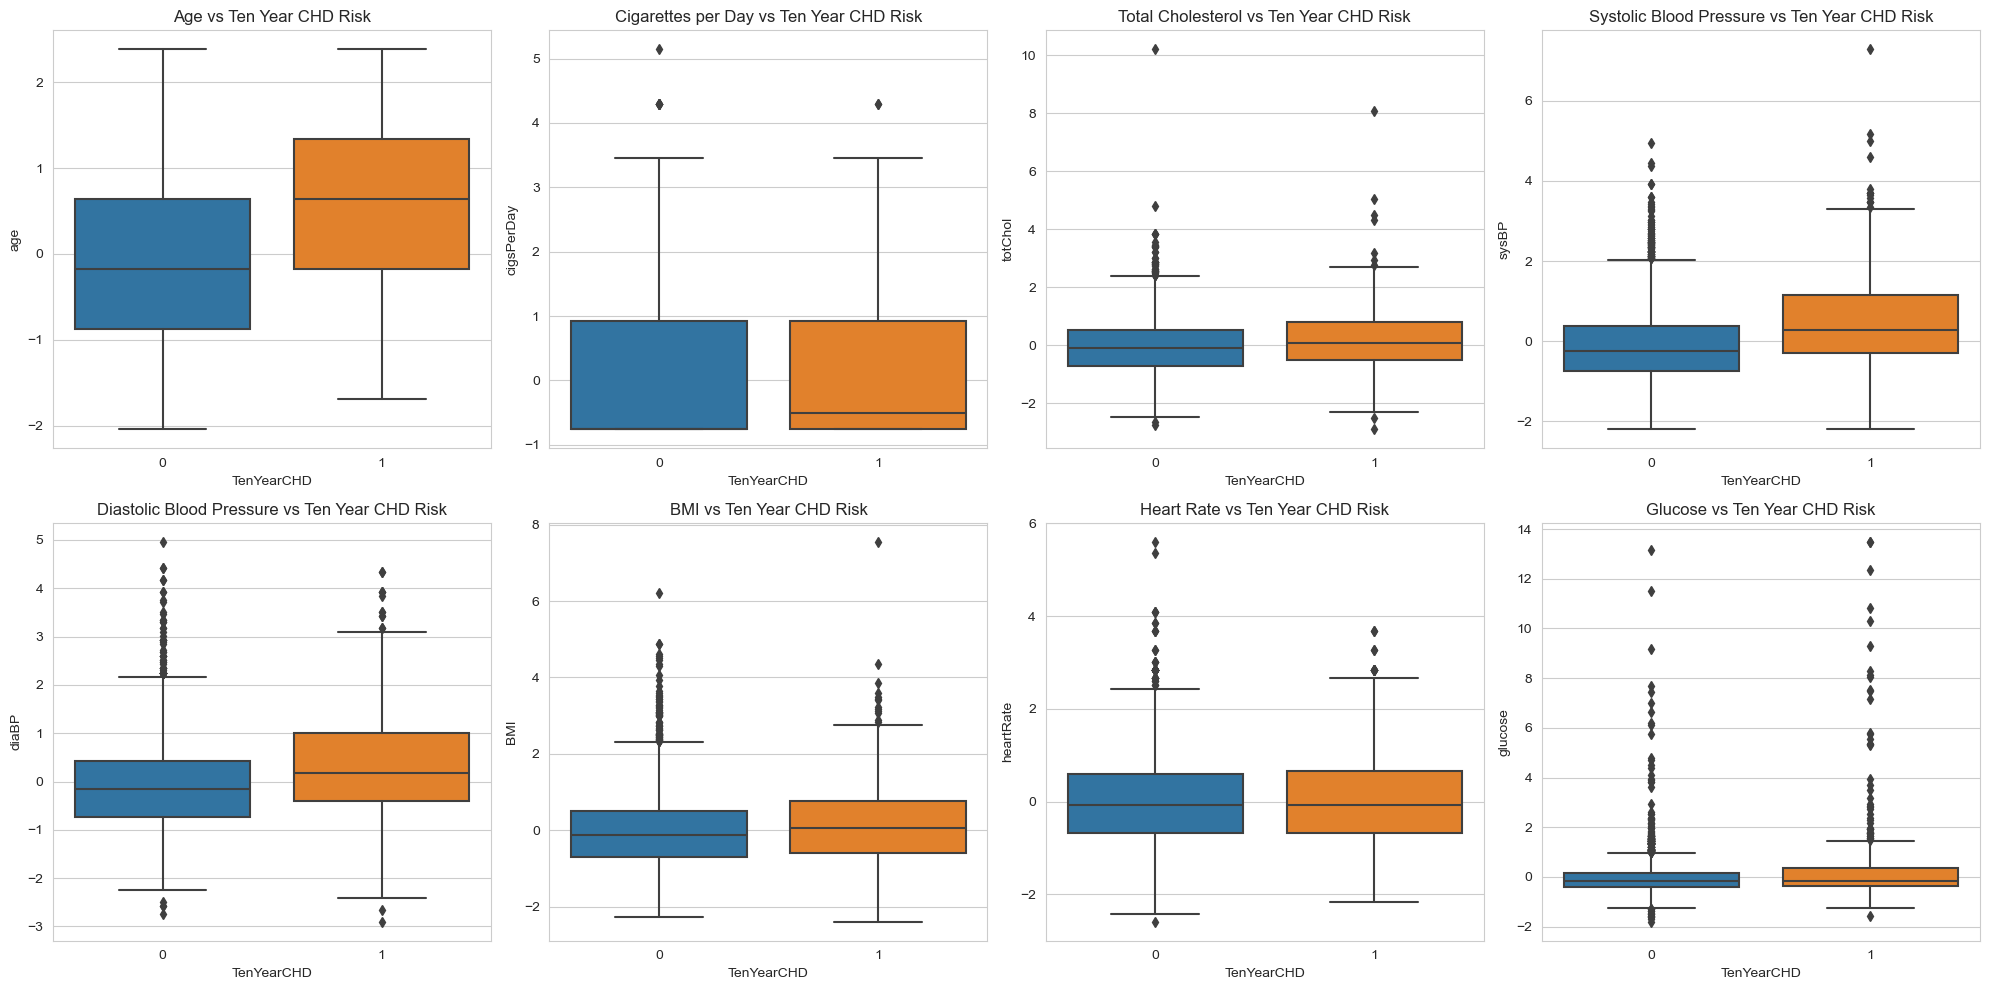

In [21]:
# Studying Target feature vs Input features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'age'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Ten Year CHD Risk')

# Plotting 'cigsPerDay'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='cigsPerDay', ax=axes[0, 1])
axes[0, 1].set_title('Cigarettes per Day vs Ten Year CHD Risk')

# Plotting 'totChol'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='totChol', ax=axes[0, 2])
axes[0, 2].set_title('Total Cholesterol vs Ten Year CHD Risk')

# Plotting 'sysBP'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='sysBP', ax=axes[0, 3])
axes[0, 3].set_title('Systolic Blood Pressure vs Ten Year CHD Risk')

# Plotting 'diaBP'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='diaBP', ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Blood Pressure vs Ten Year CHD Risk')

# Plotting 'BMI'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='BMI', ax=axes[1, 1])
axes[1, 1].set_title('BMI vs Ten Year CHD Risk')

# Plotting 'heartRate'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='heartRate', ax=axes[1, 2])
axes[1, 2].set_title('Heart Rate vs Ten Year CHD Risk')

# Plotting 'glucose'
sns.boxplot(data=df_wrangled, x='TenYearCHD', y='glucose', ax=axes[1, 3])
axes[1, 3].set_title('Glucose vs Ten Year CHD Risk')

plt.tight_layout()
plt.show()


The above plots show the distribution of numerical variables separated by the categories of the target variable 'TenYearCHD'. The orange boxes represent individuals at risk of coronary heart disease (CHD) in the next ten years, while the blue boxes represent individuals not at risk.

Age vs Ten Year CHD Risk: The median age of individuals at risk of CHD is higher than those not at risk. The interquartile range (the range between the 25th and 75th percentile, represented by the box) also doesn't overlap much, indicating that age could be a strong predictor of CHD risk.

Cigarettes per Day vs Ten Year CHD Risk: The distributions for smokers and non-smokers seem quite similar. However, the upper whisker for smokers is higher, indicating that heavy smokers are at a higher risk of CHD.

Total Cholesterol vs Ten Year CHD Risk: The median total cholesterol level seems slightly higher for individuals at risk of CHD. However, the distributions overlap significantly.

Systolic Blood Pressure vs Ten Year CHD Risk: The median systolic blood pressure is noticeably higher for individuals at risk of CHD, and the interquartile ranges don't overlap much. This suggests that systolic blood pressure could be a strong predictor of CHD risk.

Diastolic Blood Pressure vs Ten Year CHD Risk: Similar to systolic blood pressure, the median diastolic blood pressure is higher for individuals at risk of CHD. However, the distributions overlap more than for systolic blood pressure.

BMI vs Ten Year CHD Risk: The distributions for individuals at risk and not at risk of CHD overlap significantly, suggesting that BMI might not be a strong predictor of CHD risk.

Heart Rate vs Ten Year CHD Risk: The distributions for heart rate are very similar for both groups, suggesting that heart rate might not be a strong predictor of CHD risk.

Glucose vs Ten Year CHD Risk: The median glucose level is slightly higher for individuals at risk of CHD, but the distributions overlap significantly.

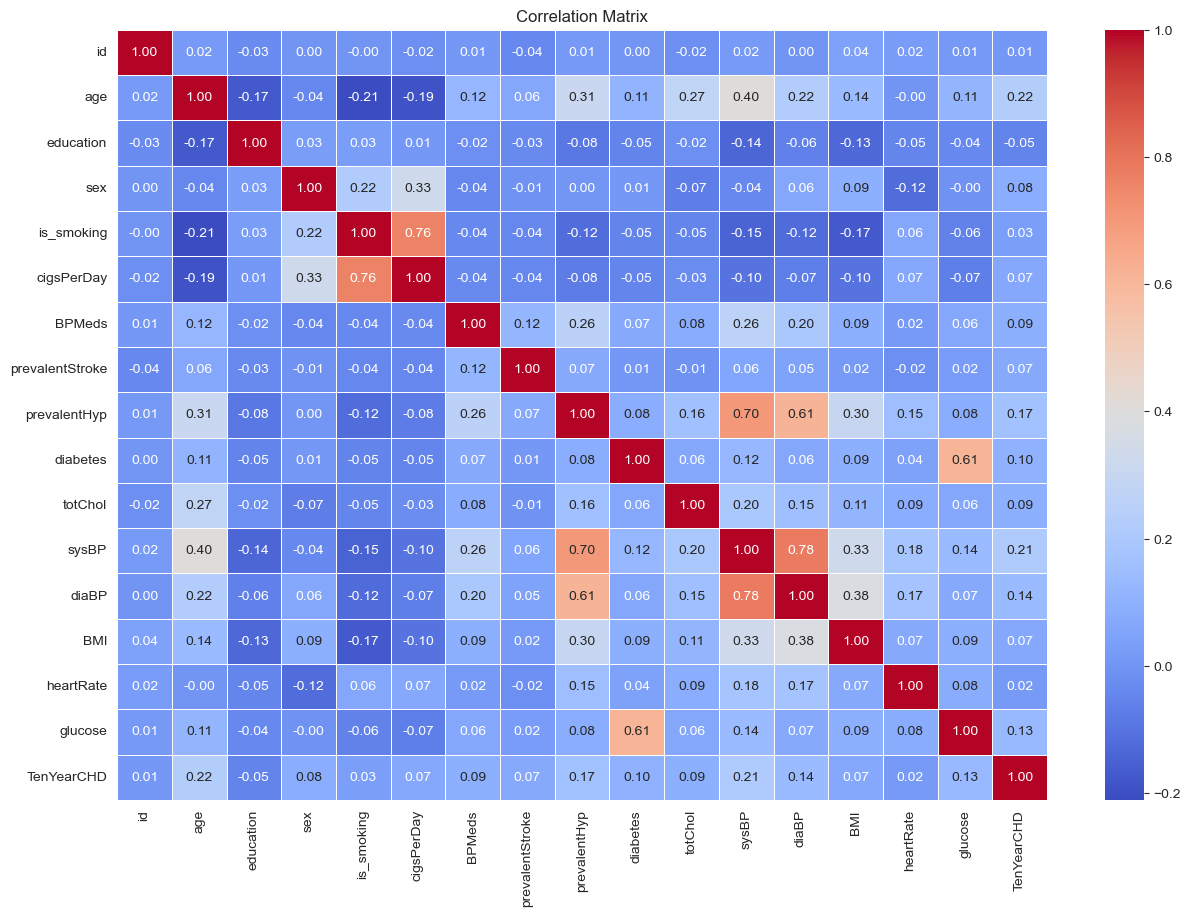

In [22]:
# Correlation Matrix
corr_matrix = df_wrangled.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get features
features = df_wrangled.drop('TenYearCHD', axis=1)

# Calculate and print VIF
vif = pd.DataFrame()
vif["Features"] = features.columns
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

vif


,Features,VIF
0,id,3.040260
1,age,1.371920
2,education,3.454901
3,sex,1.987512
4,is_smoking,3.961499
5,cigsPerDay,2.251622
6,BPMeds,1.137313
7,prevalentStroke,1.026557
8,prevalentHyp,2.803065
9,diabetes,1.637126


In [24]:
# Top positive correlations
top_positive_corr = corr_matrix['TenYearCHD'].sort_values(ascending=False)[1:6]

# Top negative correlations
top_negative_corr = corr_matrix['TenYearCHD'].sort_values()[0:5]

top_positive_corr, top_negative_corr


(age             0.224927
 sysBP           0.212703
 prevalentHyp    0.166544
 diaBP           0.135979
 glucose         0.133472
 Name: TenYearCHD, dtype: float64,
 education    -0.052076
 id            0.009866
 heartRate     0.020167
 is_smoking    0.034143
 BMI           0.066134
 Name: TenYearCHD, dtype: float64)

In [25]:
# Check imbalance in the dataset
df_wrangled['TenYearCHD'].value_counts(normalize=True)


0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df_wrangled.drop('TenYearCHD', axis=1)
y = df_wrangled['TenYearCHD']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2712, 16), (678, 16), (2712,), (678,))

In [27]:
pip install -U imbalanced-learn


                                              0.0/235.6 kB ? eta -:--:--
     ----------                              61.4/235.6 kB 1.6 MB/s eta 0:00:01
     -------------------------------------  235.5/235.6 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
y_train_smote.value_counts(normalize=True)


0    0.5
1    0.5
Name: TenYearCHD, dtype: float64

In [29]:
from scipy.stats import ttest_ind

# Separate the groups
group1 = df_wrangled[df_wrangled['TenYearCHD'] == 0]['age']
group2 = df_wrangled[df_wrangled['TenYearCHD'] == 1]['age']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2)

t_stat, p_val


(-13.43651842959444, 3.869151192892592e-40)

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_wrangled['TenYearCHD'], df_wrangled['is_smoking'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_val


(3.763250993795599, 0.052390622748532144)

In [31]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
corr_coef, p_val = pearsonr(df_wrangled['sysBP'], df_wrangled['diaBP'])

corr_coef, p_val


(0.7819075063169498, 0.0)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(random_state=42)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'C': 100, 'penalty': 'l2'}, 0.8532425434751586)

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20},
 0.8384885119569429)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.8517672082798177)

In [35]:
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50},
 0.8499228693944397)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'},
 0.848820615277976)

In [37]:
from sklearn.svm import SVC

# Define the model
svc = SVC(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score
